# The Perceptron



![Image Alt Text](ThePerceptronImage.png)


The diagram illustrates a **single-neuron perceptron**, a foundational model in artificial neural networks designed primarily for binary classification tasks. This simple yet powerful algorithm involves several key components and steps:

1. **Inputs**: The perceptron receives inputs, denoted here as $x_1^{(i)}$ and $x_2^{(i)}$, which represent features of an instance in the dataset. An additional constant input of 1.0 is used to incorporate the bias term \(b\) effectively.

2. **Weights and Bias**: Each input is associated with a weight ($w_1$ and $w_2$ in this model) that signifies its importance. The bias $b$, working as a threshold, adjusts the activation level needed to trigger an output.

3. **Pre-Activation**: The perceptron computes a weighted sum of the inputs, which is the linear combination $z = w_1x_1^{(i)} + w_2x_2^{(i)} + b$. This sum represents the pre-activation level.

4. **Activation Function**: The perceptron uses an activation function $\phi(z)$ to convert the pre-activation value into an output. In this specific case, a step function is used where $\phi(z) = 1$ if $z \geq 0$ and $\phi(z) = -1$ if $z < 0$. This function maps all inputs to one of two classes, making the model inherently suited for binary classification.

5. **Output**: The final output $\hat{y}^{(i)} = a$ reflects the classification result based on the processed input signals through the network. This output can be directly used as a class label prediction in binary classification problems.

This model's simplicity allows for easy interpretation and implementation, making it historically significant in the field of machine learning as one of the earliest algorithms used for pattern recognition.


# Implementation



The palmer_penguins.csv dataset is a popular dataset used in data science and statistics for data exploration and visualization, especially as an alternative to the well-known Iris dataset. 

The Palmer Penguins dataset provides a compelling alternative to the classic Iris dataset for data visualization and exploratory data analysis. Collected by Dr. Kristen Gorman with the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network, this dataset offers a rich set of variables that can be used to demonstrate data analysis techniques.

The dataset comprises 344 observations of penguins from three different species: Adélie, Gentoo, and Chinstrap, collected from three islands in the Palmer Archipelago, Antarctica. It includes several measurements from these penguins, such as:

- **species**: The penguin species (Adélie, Gentoo, or Chinstrap).
- **island**: The island in the Palmer Archipelago where the penguin was observed (Dream, Torgersen, or Biscoe).
- **bill_length_mm**: Length of the dorsal ridge of a penguin's bill.
- **bill_depth_mm**: Depth of the dorsal ridge of a penguin's bill.
- **flipper_length_mm**: Length of a penguin's flipper.
- **body_mass_g**: Body mass of the penguin.
- **sex**: The sex of the penguin (male or female).


## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions


## The Perceptron Class

In [2]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Data Processing

In [3]:
# Import dataset
pp = pd.read_csv(r"/Users/betelgeuse/INDE577/Supervised Learning/Datasets/palmer_penguins.csv")
# Focus on two species and drop NA cases
pp = pp[pp['species'].isin(['Adelie', 'Chinstrap'])]
pp = pp.dropna()

To assess the perceptron's performance, we concentrate solely on data on two species within the dataset. We employ the Length of the dorsal ridge of a penguin's bill and the Length of a penguin's flipper as independent variables to predict the outcome of the dependent variable.

In [4]:
# Choose bill_length and flipper_length as Independent variable
X = pp[['bill_length_mm', 'flipper_length_mm']].values

# Encode Adelie to -1 and Chinstrap to 1
y = pp.species.values
y = np.where(y == 'Adelie', -1, 1)


## Training

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

percep = Perceptron(epochs=20_000)
percep.train(X_train, y_train)

y_pred = percep.predict(X_test)

# Visualization

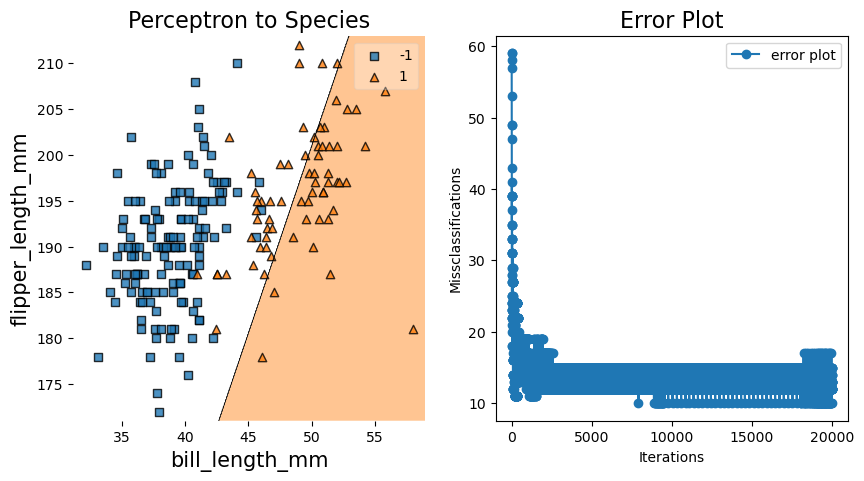

In [6]:
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
plot_decision_regions(X, y, clf = percep)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.title('Perceptron to Species',fontsize = 16)

plt.subplot(1,2,2)
#plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.title("Error Plot", fontsize = 16)
plt.legend()

In [7]:
print(accuracy_score(y_test, y_pred))

0.8769230769230769


The high accuracy achieved, at 87.69%, suggests that the perceptron model has effectively learned to distinguish between the sexes using the features provided, with the error rate diminishing significantly early in the training phase. This outcome highlights the perceptron's capability to handle linear classification tasks efficiently.
